# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

In [3]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

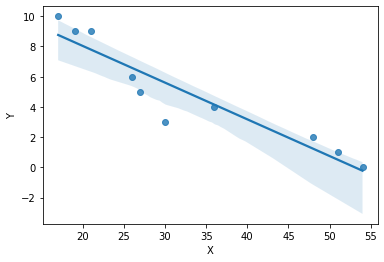

In [5]:
sns.regplot(x='X',y='Y',data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Yes, there seems to be a linear (negative) correlation between the 2 values. 
# As the age (x) increases, the tardiness (y) decreases.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# First, let's look at the covariance:

student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [9]:
# Now let's look at the correlation:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [ ]:
# We can confirm that there is a very strong negative linear correlation between the two variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# I am going to use a simple linear regression.
# The outcome variable will be tardiness (tardies).

# First I build the model (create the object):
model = linear_model.LinearRegression()

# Then I train the model with the data:
x = student_data[['X']]
y = student_data[['Y']]
model.fit(x,y)

LinearRegression()

In [15]:
model.intercept_

array([12.88880336])

In [16]:
model.coef_

array([[-0.24282077]])

Plot your regression model on your scatter plot.

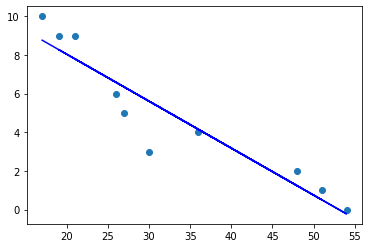

In [23]:
## Now I can the linear regression on the plot:

# b0 - is the intercept
# b1 - is the coeficient

b0 = model.intercept_
b1 = model.coef_[0]

regression_line = b0 + b1 * x

plt.plot(x, regression_line, c = 'blue')
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# Let's check the score of the model:

model.score(x,y)

0.8820265558250109

In [ ]:
# We get a score of 0.882, which is a very good result (the closer to 1, the better).
# As we had guessed from the beginning, there is a strong negative linear correlation between age 
# and tardies and we can use the age as a good predictor.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
# First, let's calculate the correlation:

subset = vehicles[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
subset.corr()

# There seems to be a strong positive correlation between the emissions and the variables:
# cylinders, fuel barrels/year, fuel cost/year.
# There is also a strong negative correlation with combined MPG.
# There is some negative correlation with year, but this is not strong.

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [64]:
# The regression model in this case will be a multiple linear regression

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

In [65]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scaled = std_scaler.fit_transform(X)
standardized_data = pd.DataFrame(scaled, columns= X.columns)
standardized_data.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,-1.657526,-1.005601,0.398406,-0.572991,0.113229
1,-1.657526,0.133841,1.733866,-1.355412,1.296774
2,-1.558371,-1.005601,0.669671,-0.768596,0.409115
3,-1.558371,0.133841,1.733866,-1.355412,1.296774
4,-1.360059,0.133841,0.669671,-0.768596,1.296774


In [66]:
# With this we can now create the model object:

model = linear_model.LinearRegression()

In [68]:
model.fit(standardized_data, y)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [70]:
model.score(standardized_data, y)

0.9808734920269122

In [ ]:
# The model score is very high. 
# The combination of variables chosen can predict with high confidence the outcome variable.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [55]:
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

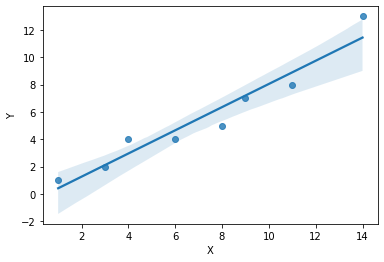

In [56]:
# Scatter plot with regression line using seaborn:

sns.regplot(x='X',y='Y',data=data)

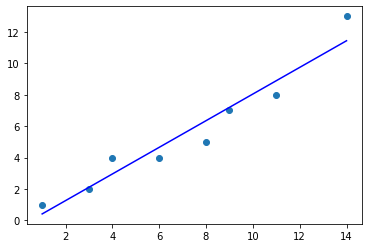

In [58]:
# As an alternative to above, we can also build the model and plot it like this:

model = linear_model.LinearRegression()

x = data[['X']]
y = data[['Y']]
model.fit(x,y)

b0 = model.intercept_
b1 = model.coef_[0]

regression_line = b0 + b1 * x
plt.plot(x, regression_line, c = 'blue')
plt.scatter(x,y)
plt.show()

In [59]:
model.score(x,y)

0.9316696375519905

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# There is a positive correlation between the two variables (the more people invited, 
# the more people who attend), although it is not perfectly linear.
# Just by looking at the plot above, the data does not seem to support the 
# initial assumption (the more people invited, the more are unable to attend).

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# There seems to be an outlier in the last value (for 14 people invited, 13 attend). 
# Therefore, I am removing the last value and plotting it again.

In [60]:
data.drop([7], inplace=True)
data.tail(2)

,X,Y
5,9,7
6,11,8


<AxesSubplot:xlabel='X', ylabel='Y'>

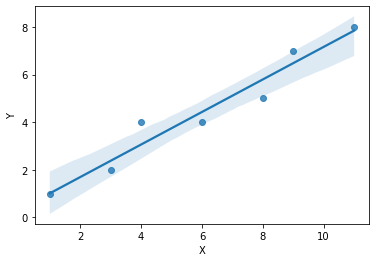

In [61]:
sns.regplot(x='X',y='Y',data=data)

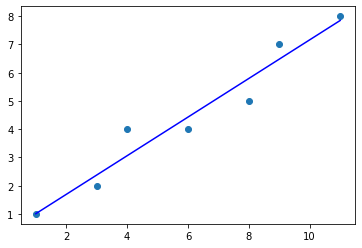

In [62]:
model = linear_model.LinearRegression()

x = data[['X']]
y = data[['Y']]
model.fit(x,y)

b0 = model.intercept_
b1 = model.coef_[0]

regression_line = b0 + b1 * x
plt.plot(x, regression_line, c = 'blue')
plt.scatter(x,y)
plt.show()

In [63]:
model.score(x,y)

0.9433811802232854

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Even removing the potential outlier, the data does not seem to support the initial assumption
# (the more people invited, the more people are unable to attend).
# There seems to be a clear positive correlation: the more people invited, the more people attend.